In [3]:
import random
"""
计算在一组人中至少有两个人生日相同的概率。
参数:
num_people (int): 组内的人数。
num_simulations (int): 模拟的次数。
返回:
float: 至少两个人生日相同的概率。
示例:
>>> birthday_problem(23, 10000)
0.507
概率计算的方法是，首先生成一组人的生日，然后检查是否有重复的生日。
这个函数通过模拟多次随机生日分配来估计概率。内部函数 `has_duplicate_birthday` 用于检查一组人中是否有重复的生日。
"""

def birthday_problem(num_people, num_simulations):
    def has_duplicate_birthday(num_people):
        birthdays = [random.randint(1, 365) for _ in range(num_people)]
        return len(birthdays) != len(set(birthdays))
    
    duplicate_count = sum(has_duplicate_birthday(num_people) for _ in range(num_simulations))
    probability = duplicate_count / num_simulations
    return probability

num_people = 40
num_simulations = 10000
probability = birthday_problem(num_people, num_simulations)
print(f"The probability of at least two people sharing a birthday in a group of {num_people} is approximately {probability:.2f}")

The probability of at least two people sharing a birthday in a group of 40 is approximately 0.89


抽屉原理（Pigeonhole Principle），又称鸽巢原理或鸽笼原理，是组合数学中的一个基本原理。它的内容非常直观，但在很多数学问题中非常有用。抽屉原理的基本内容是：

**如果将 $ n+1 $ 个物体放入 $ n $ 个抽屉中，那么至少有一个抽屉里会包含两个或更多的物体。**

### 抽屉原理的简单例子

假设有 4 只鸽子和 3 个巢穴，如果将每只鸽子放入一个巢穴中，那么至少有一个巢穴里会有 2 只或更多的鸽子。

### 抽屉原理的应用

抽屉原理看似简单，但它在解决某些问题时非常有效。以下是几个常见的应用：

#### 1. 不同颜色袜子问题
假设有 10 双白袜子和 10 双黑袜子混合在一个抽屉里。早晨起床时，房间黑暗，你想要从中拿出两只同色的袜子。要确保拿出两只同色的袜子，最少需要拿几只？

**解答**：根据抽屉原理，将袜子按颜色分成两个抽屉（黑色和白色）。最坏情况下，如果前两次各取一种颜色的袜子，那么第三只袜子一定会和前面的某一只同色。因此，最少需要拿 **3 只**。

#### 2. 数学竞赛问题
在一个数学竞赛中，有 13 名学生参加，他们每人的得分范围是 1 到 25 分。证明至少有两名学生的得分是相同的。

**解答**：得分从 1 到 25 一共有 25 个可能的分数。根据抽屉原理，如果有 26 名学生参加，那么至少有一个分数会被多名学生获得。在此例中，13 个学生要分到 25 个得分区间内，因此至少会有两个学生获得相同的得分。

### 抽屉原理的推广（多维抽屉原理）

对于多维情况，抽屉原理也可以推广。例如，如果有 $k \times n + 1 $ 个物体被放入 $n$ 个抽屉中，那么至少有一个抽屉中包含 **至少 $k+1$ 个**物体。

#### 例子
假设有 20 个苹果放入 6 个篮子中，那么至少有一个篮子里有至少 4 个苹果。

### 抽屉原理的实际意义

尽管抽屉原理看似简单，它在数学竞赛、计算机科学、概率论等领域有着广泛应用。抽屉原理帮助我们在面对复杂分配问题时迅速做出结论，尤其是在解决某些极端情况的问题时。

如果有 $ n $ 个人，且每个人的生日都不相同，那么我们可以用概率论来计算这个事件发生的概率。

假设一年有 365 天，每个人的生日随机分布在这 365 天中。我们希望 $ n $ 个人的生日不相同，因此这是一个 **生日问题** 的变种。

### 公式推导

1. **第一个人**可以在任意一天过生日，所以他有 $ 365 $ 种选择。
2. **第二个人**要与第一个人不同，他有 $ 365 - 1 = 364 $ 种选择。
3. **第三个人**要与前两个人不同，他有 $ 365 - 2 = 363 $ 种选择。

依此类推，第 $ k $ 个人有 $ 365 - (k - 1) $ 种选择。这样，所有生日不相同的概率是：

$$
P(\text{所有生日不相同}) = \frac{365 \times 364 \times 363 \times \cdots \times (365 - n + 1)}{365^n}
$$

### 公式简化

我们可以将上式写成乘积的形式：

$$
P(\text{所有生日不相同}) = \prod_{k=0}^{n-1} \frac{365 - k}{365}
$$

### 使用公式计算

在实际计算中，当 $ n $ 增大时，生日不相同的概率会迅速下降。例如，当 $ n = 23 $ 时，生日相同的概率大约是 50%，生日不相同的概率就是 50% 左右。

这个公式是经典生日问题的一个推论，通过它可以计算在任意人数 $ n $ 下，生日不相同的概率。

为了找到最小的 $ n $ 值，使得 $ n $ 个人中所有人生日不相同的概率低于给定概率（即至少有两人生日相同的概率高于给定概率），我们可以编写一个 Python 函数来计算。

具体步骤是：

1. 计算生日不相同的概率，随着 $ n $ 增加，这个概率会逐渐降低。
2. 找到第一个使得生日不相同的概率低于给定概率的 $ n $ 值。

In [ ]:
def min_people_for_given_probability(p=0.5):
    # 初始值
    probability_not_same = 1.0  # 初始概率（即0个人时，生日相同的概率为1）
    days_in_year = 365
    n = 0

    # 计算概率，直到不相同的概率小于目标概率 p
    while probability_not_same > p:
        n += 1
        probability_not_same *= (days_in_year - n + 1) / days_in_year

    return n

# 测试输入一个概率值（如 0.5）
p = float(input("请输入生日不相同的目标概率（如0.5）: "))
n = min_people_for_given_probability(p)
print(f"要使得生日不相同的概率小于 {p}，最小人数为 {n}")

要使得生日不相同的概率小于 0.5，最小人数为 23


### 代码说明

- `probability_not_same`：存储所有人生日不相同的概率，从1（100%）开始逐步减少。
- `days_in_year`：假设一年有 365 天。
- 每次循环中，计算 $ n $ 个人生日不相同的概率。
- 当 `probability_not_same` 小于用户输入的 `p` 时，循环结束，返回对应的最小人数 `n`。

### 示例

如果输入 $ p = 0.5 $，输出结果将接近 23，表明在23个人的情况下，至少两人生日相同的概率超过 50%。

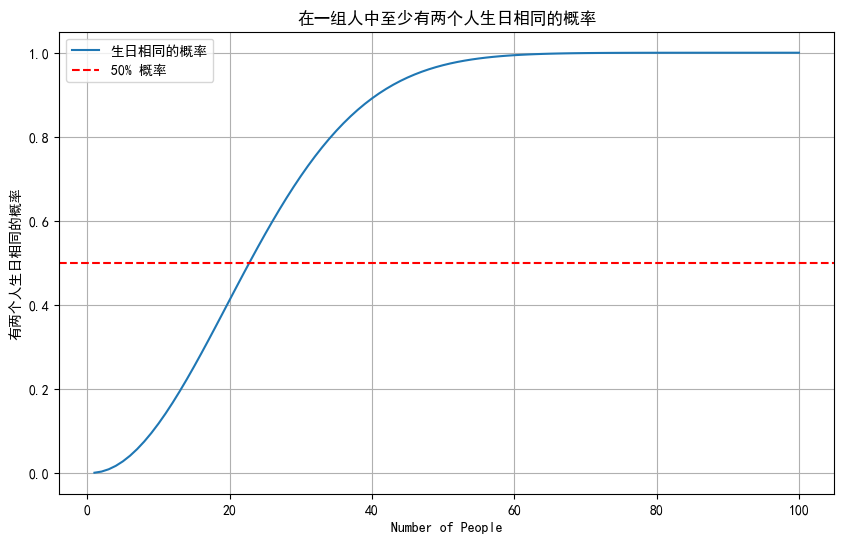

In [8]:
import matplotlib.pyplot as plt

def calculate_probabilities(max_people):
    days_in_year = 365
    probabilities = []
    probability_not_same = 1.0
    
    for n in range(1, max_people + 1):
        probability_not_same *= (days_in_year - n + 1) / days_in_year
        probabilities.append(1-probability_not_same)
    
    return probabilities

# 设置最大人数
max_people = 100
probabilities = calculate_probabilities(max_people)

# 绘制图表
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_people + 1), probabilities, label="生日相同的概率")
plt.axhline(y=0.5, color='r', linestyle='--', label="50% 概率")
plt.xlabel("Number of People")
plt.ylabel("有两个人生日相同的概率")
plt.title("在一组人中至少有两个人生日相同的概率")
plt.legend()
plt.grid(True)
plt.show()


### 代码说明

- `probability_not_same`：存储所有人生日不相同的概率，从1（100%）开始逐步减少。
- `days_in_year`：假设一年有 365 天。
- 每次循环中，计算 $ n $ 个人生日不相同的概率。
- 当 `probability_not_same` 小于用户输入的 `p` 时，循环结束，返回对应的最小人数 `n`。

### 示例

如果输入 $ p = 0.5 $，输出结果将接近 23，表明在23个人的情况下，至少两人生日相同的概率超过 50%。

ValueError: '++' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

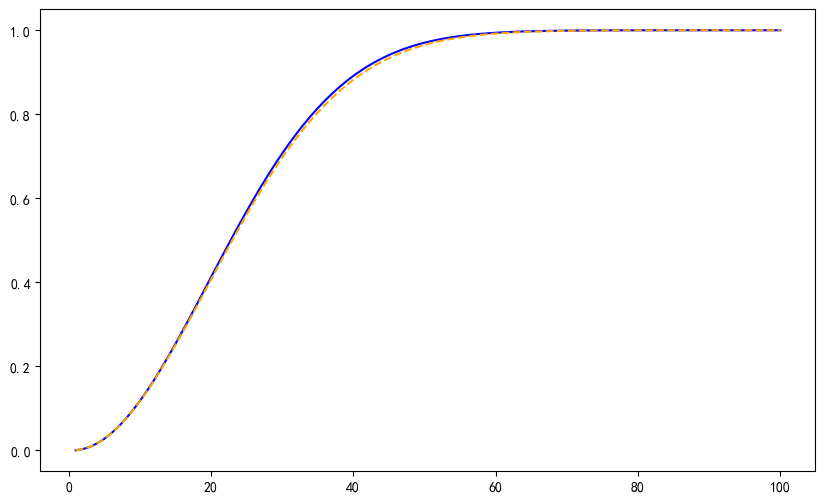

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 标准计算概率函数
def exact_probability(n, days_in_year=365):
    probability = 1.0
    for k in range(n):
        probability *= (days_in_year - k) / days_in_year
    return 1-probability

# 近似计算概率函数（使用泰勒展开）
def approximate_probability(n, days_in_year=365):
    return 1-np.exp(-n * (n - 1) / (2 * days_in_year))

# 设置最大人数
max_people = 100
people = np.arange(1, max_people + 1)

# 计算两种方法下的概率
exact_probabilities = [exact_probability(n) for n in people]
approx_probabilities = [approximate_probability(n) for n in people]

# 绘制对比图表
plt.figure(figsize=(10, 6))
plt.plot(people, exact_probabilities, label="Exact Probability", color="blue")
plt.plot(people, approx_probabilities, label="Approximate Probability", color="orange", linestyle='--')
plt.axhline(y=0.5, color='red', linestyle=':', label="50% Probability")
plt.xlabel("Number of People")
plt.ylabel("Probability of Unique Birthdays")
plt.title("Comparison of Exact and Approximate Probability of Unique Birthdays")
plt.legend()
plt.grid(True)
plt.show()